<a href="https://colab.research.google.com/github/harshchan/AI-ML-python-codes/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Get all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import io

In [51]:
#Get the data
from  google.colab  import  files 
uploaded = files.upload()
#houses = pd.read_csv("/home/sagar/Desktop/Desk_folders/Artificial Intelligence - Machine Learning/4.Case_Study_Regression_Methods/Regression/archive/kc_house_data.csv")
#houses.head()

Saving kc_house_data.csv to kc_house_data (1).csv


In [52]:
houses = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [53]:
#Have a look at different stats
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [54]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
#Check for na values
print(houses.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


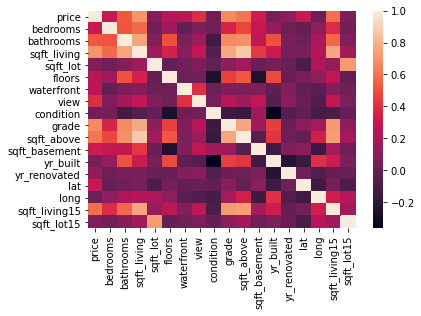

In [76]:
# check for any correlations between variables
corr = houses.corr()
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a 
# high influence in price

In [74]:
# create x and y
#from diagram above we can see tht there are highly correlated with each other and thus 
#these will be the main aruguments of our datasets
#from these later we can create our independent variables which will be used to find y later
#feature_cols = ['sqft_living','grade','sqft_above','sqft_living15',"bathrooms",'view'] 
#x = houses[feature_cols] # predictor
#y = houses.price # response

In [77]:
houses.drop(['id','date','zipcode'],axis =1,inplace = True )

KeyError: ignored

In [78]:

x = houses.drop('price',axis = 1,inplace = False)
y = houses.price

In [79]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [80]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [81]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 2) 
# the test set will be 20% of the whole data set

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 17)
(4323, 17)
(17290,)
(4323,)


In [83]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#Predict
#these figures are x wale means 
#sqft_living	grade	sqft_above	sqft_living15	bathrooms	view these values
#linreg.predict(np.array([[1000,5,1000,1000,2,1]]))

In [86]:
#Mean squared error
mse = mean_squared_error(y_test, linreg.predict(x_test))
print(mse)
print(np.sqrt(mse))

40161301936.67338
200402.8491231434


In [87]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, linreg.predict(x_test))
print(mae)

126571.3154957219


In [88]:
#R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, linreg.predict(x_test))
print(r2)

0.7123284864369755


In [89]:
#Accuracy 
#score of model is more preferred term
print(linreg.score(x_test,y_test))
print("Accuracy is ",linreg.score(x_test,y_test)*100," % ")

0.7123284864369755
Accuracy is  71.23284864369755  % 


In [90]:
#Cross validation score
scores = cross_val_score(linreg, x, y, cv=10)
scores

array([0.69220712, 0.69346393, 0.68362091, 0.68860914, 0.67797598,
       0.69790231, 0.70777426, 0.70216492, 0.69660973, 0.66860173])

In [91]:
scores.max()

0.7077742570503065

In [72]:
#as we increase the number of the variables we get accuracy as 70 % as compared to  the 59% 
#but still 70# is less


In [93]:
y_pred=linreg.predict(x_test)

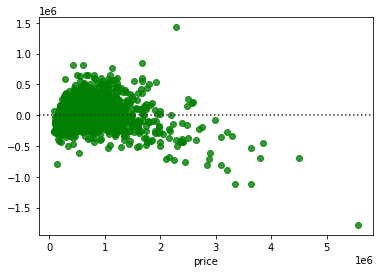

In [94]:
sns.residplot(x=y_test,y=y_pred,color='g')